In [13]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.models.NBC_sklearn import NBC_sklearn
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [14]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "wut"
dataset = "trapped_lovers"
methods = ["NBC_TI", "NBC", "NBC_sklearn", "sklearn_kmeans"]
k = 50

## Loading benchmark dataset

In [15]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]

## Fetching precomputed clustering results

In [16]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC

In [17]:
%%time
model = NBC(k)
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 1min 56s
Wall time: 2min


## NBC-TI

In [18]:
%%time
model = NBC_TI(k)
results["NBC_TI"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 1min 10s
Wall time: 1min 13s


## NBC using sklearn.neighbors

In [19]:
%%time
model = NBC_sklearn(k)
results["NBC_sklearn"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 609 ms
Wall time: 142 ms


## Comparison

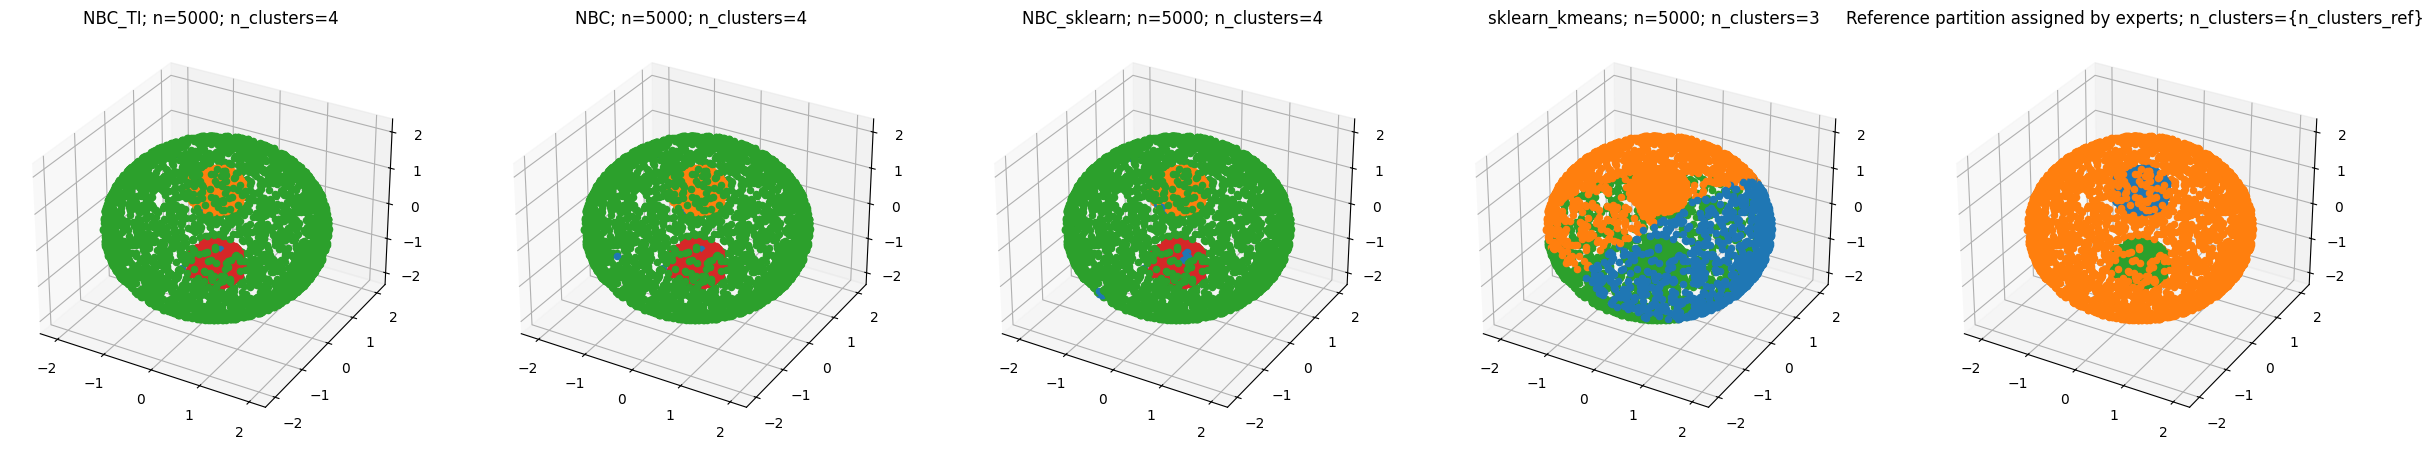

In [20]:
plot_results(benchmark.data, methods, results, reference)

In [21]:
confusion_matricies_table(methods, results, reference, title=f"Confusion matricies\nk={k}")

Confusion matricies
k=50
╒═════════════════════════╤═════════════════════════╤═════════════════════════╤════════════════════╕
│ NBC_TI                  │ NBC                     │ NBC_sklearn             │ sklearn_kmeans     │
│ [[   5  995    0    0]  │ [[   6  994    0    0]  │ [[   6  994    0    0]  │ [[   0 1000    0]  │
│  [   6    0 2994    0]  │  [   7    0 2993    0]  │  [  12    0 2988    0]  │  [ 861 1054 1085]  │
│  [   1    0    0  999]] │  [   1    0    0  999]] │  [   6    0    0  994]] │  [   0    0 1000]] │
╘═════════════════════════╧═════════════════════════╧═════════════════════════╧════════════════════╛


In [22]:
measures(methods, results, reference, title=f"Measures\nk={k}")

Measures
k=50
╒═════════════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╕
│ NBC_TI                  │ NBC                      │ NBC_sklearn              │ sklearn_kmeans           │
│ ar: 0.9961044965699303  │ ar: 0.9954559503280528   │ ar: 0.9922044088906379   │ ar: 0.15394891175048728  │
│ r: 0.9980812962592519   │ r: 0.9977620324064813    │ r: 0.9961621124224845    │ r: 0.5899764752950589    │
│ fm: 0.9978167162546987  │ fm: 0.9974529637203805   │ fm: 0.9956280972527447   │ fm: 0.49681305197324743  │
│ afm: 0.9961087081615656 │ afm: 0.9954616730019592  │ afm: 0.9922211001935201  │ afm: 0.15485259285803124 │
│ mi: 0.9480663125492511  │ mi: 0.947755564282063    │ mi: 0.9452798795332029   │ mi: 0.3769719052493272   │
│ nmi: 0.99021457568424   │ nmi: 0.9888800455242293  │ nmi: 0.981666173590847   │ nmi: 0.38012848124807214 │
│ ami: 0.9902081868274436 │ ami: 0.9888728401635876  │ ami: 0.9816545516239871  │ ami: 0.37987814054669444 │
│ npa